In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

pd.plotting.register_matplotlib_converters()
sns.set_palette('bright')
matplotlib.rcParams['axes.unicode_minus'] = False
sns.set_style('whitegrid')
palette = sns.color_palette("bright")
font_files = fm.findSystemFonts(fontpaths=['/Library/Fonts'])
fm.fontManager.ttflist.extend(fm.createFontList(font_files))
plt.rcParams['font.family'] = 'NanumBarunGothic'
%matplotlib inline

In [105]:
wage = pd.read_csv(DATA / './wage.csv')
wage['DATE'] = pd.to_datetime(wage.DATE)
wage = wage.set_index('DATE')
wage['wsg'] = np.log(wage.ws).diff(4) * 100
wage['wug'] = np.log(wage.wu).diff(4) * 100
wage

,ws,wu,wsg,wug
DATE,,,,
2000-01-01,886,503,NaN,NaN
2000-04-01,887,506,NaN,NaN
2000-07-01,896,506,NaN,NaN
2000-10-01,894,506,NaN,NaN
2001-01-01,916,512,3.329941,1.773445
...,...,...,...,...
2019-07-01,1383,749,3.307909,1.750886
2019-10-01,1382,747,3.086211,0.133958
2020-01-01,1386,768,2.631731,3.849181


In [106]:
emp = pd.read_csv(DATA / './emp.csv')
emp['DATE'] = pd.to_datetime(emp.DATE)
emp = emp.set_index('DATE')
emp = emp.resample('1QS').mean()
emp

,emps,empu
DATE,,
1992-01-01,78.633333,62.066667
1992-04-01,78.966667,61.800000
1992-07-01,79.033333,61.700000
1992-10-01,78.366667,61.766667
1993-01-01,78.366667,61.733333
...,...,...
2020-01-01,71.766667,55.800000
2020-04-01,66.633333,46.733333
2020-07-01,68.300000,49.800000


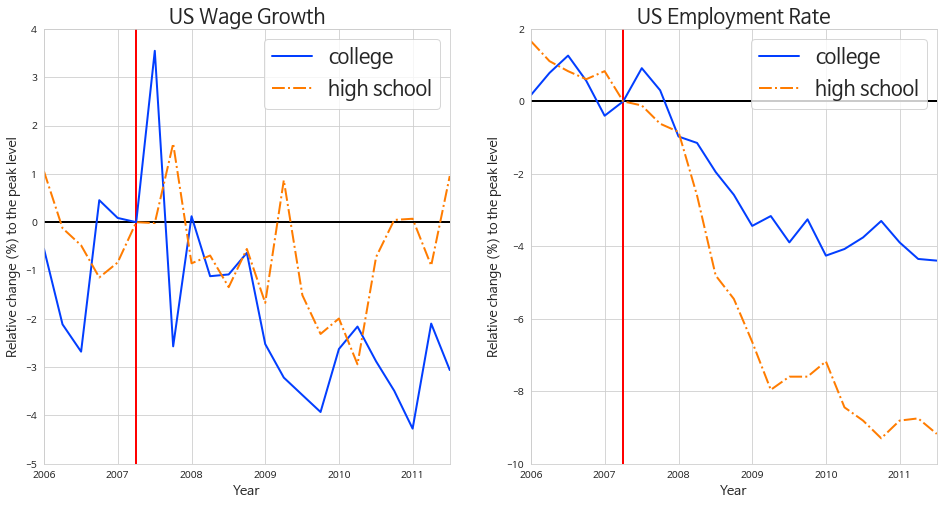

In [104]:
ds = '2006-07-01'
peak = '2007-10-01'
de = '2012-01-01'

plt.subplots(figsize=(16,8))
plt.subplot(121)
plt.plot(wage.loc[ds:de].wsg - wage.loc[peak].wsg, label="college", lw=2)
plt.plot(wage.loc[ds:de].wug - wage.loc[peak].wug, label="high school", linestyle="dashdot", lw=2)
plt.legend(fontsize=20)
plt.hlines(0, pd.to_datetime(ds), pd.to_datetime(de), lw=2)
plt.vlines(pd.to_datetime(peak), -5.0,4.0, color='red', lw=2)
plt.xlim(pd.to_datetime(ds), pd.to_datetime(de))
plt.ylim(-5.0,4.0)
plt.xticks(pd.date_range(ds,de, freq = 'QS')[::4], [d.year for d in pd.date_range(ds,de, freq = 'QS')[::4]])
plt.title("US Wage Growth", fontsize=20)
plt.xlabel("Year", fontsize=13)
plt.ylabel("Relative change (%) to the peak level", fontsize=13)
plt.subplot(122)
plt.plot(100 * (np.log(emp.loc[ds:de].emps) - np.log(emp.loc[peak].emps)), label="college", lw=2)
plt.plot(100 * (np.log(emp.loc[ds:de].empu) - np.log(emp.loc[peak].empu)), label="high school", linestyle="dashdot", lw=2)
plt.legend(fontsize=20)
plt.hlines(0, pd.to_datetime(ds), pd.to_datetime(de), lw=2)
plt.vlines(pd.to_datetime(peak), -10.0,2.0, color='red', lw=2)
plt.xlim(pd.to_datetime(ds), pd.to_datetime(de))
plt.ylim(-10.0,2.0)
plt.xticks(pd.date_range(ds,de, freq = 'QS')[::4], [d.year for d in pd.date_range(ds,de, freq = 'QS')[::4]])
plt.title("US Employment Rate", fontsize=20)
plt.xlabel("Year", fontsize=13)
plt.ylabel("Relative change (%) to the peak level", fontsize=13)
plt.show()